# 1. Loading Library

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [3]:
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
bank.shape

(11162, 17)

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Text(0.5, 1.0, 'Heatmap of null values present in the data or not')

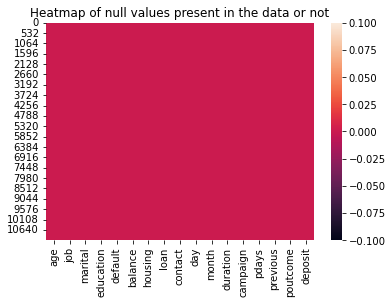

In [9]:
sns.heatmap(bank.isnull())
plt.title('Heatmap of null values present in the data or not')

# Target variable deposit

In [10]:
bank.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [12]:
bank.deposit.unique()

array(['yes', 'no'], dtype=object)

In [14]:
bank.deposit.replace(['yes', 'no'],[1,0],inplace=True)

Text(0.5, 1.0, 'Distribution of deposit')

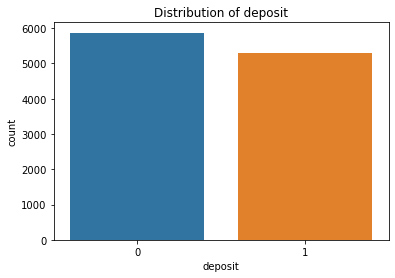

In [18]:
sns.countplot(bank.deposit)
plt.title('Distribution of deposit')

In [19]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

# 1. age

In [20]:
bank.age.value_counts()

31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: age, Length: 76, dtype: int64

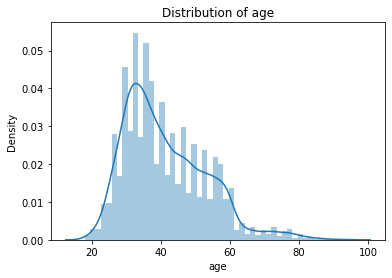

In [22]:
sns.distplot(bank.age)
plt.title('Distribution of age')
plt.show()

Text(0.5, 1.0, 'Boxplot of age')

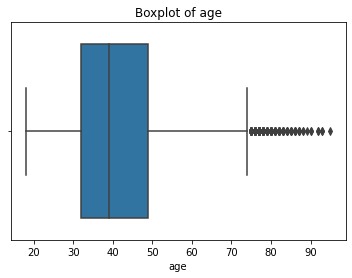

In [23]:
sns.boxplot(bank.age)
plt.title('Boxplot of age')

Text(0.5, 1.0, 'Boxplot of age vs deposit')

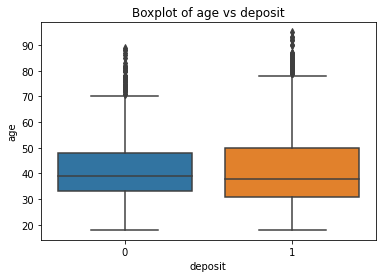

In [26]:
sns.boxplot(x='deposit',y='age',data=bank)
plt.title('Boxplot of age vs deposit')

In [30]:
from scipy.stats import ttest_ind
a=bank[bank.deposit==0]
b=bank[bank.deposit==1]
ttest_ind(a.age,b.age)

Ttest_indResult(statistic=-3.6892130272779955, pvalue=0.00022601800590796526)

In [34]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model_age=ols('age~deposit',data=bank).fit()
sm.stats.anova_lm(model_age)

,df,sum_sq,mean_sq,F,PR(>F)
deposit,1.0,1.929507e+03,1929.506546,13.610293,0.000226
Residual,11160.0,1.582133e+06,141.768188,NaN,NaN


# see both gives you the same result     p-value is 0.000226 which is less than 0.05  AGE a good predictor

In [35]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

# 2.   job

In [36]:
bank.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

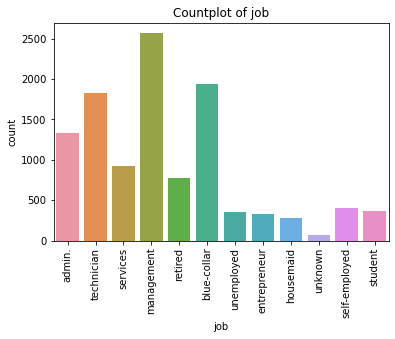

In [41]:
sns.countplot(bank.job)
plt.title('Countplot of job')
plt.xticks(rotation=90)
plt.show()

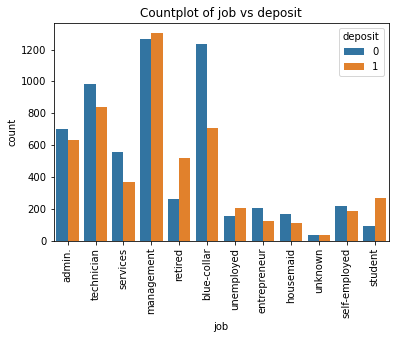

In [43]:
sns.countplot(x='job',hue='deposit',data=bank)
plt.title('Countplot of job vs deposit')
plt.xticks(rotation=90)
plt.show()

In [48]:
from scipy.stats import chi2,chi2_contingency

ct_job=pd.crosstab(bank.job,bank.deposit)
chi2_contingency(ct_job,correction=False)

(378.0752558664989,
 2.741689587081072e-74,
 11,
 array([[ 701.89768859,  632.10231141],
        [1022.85540226,  921.14459774],
        [ 172.58054112,  155.41945888],
        [ 144.16789106,  129.83210894],
        [1350.12703817, 1215.87296183],
        [ 409.35262498,  368.64737502],
        [ 213.09487547,  191.90512453],
        [ 485.645852  ,  437.354148  ],
        [ 189.41766708,  170.58233292],
        [ 959.19001971,  863.80998029],
        [ 187.83918653,  169.16081347],
        [  36.83121304,   33.16878696]]))